## MDS 
Multidimensional scaling (MDS) is similar to factor analysis, which reduces the number of variables one has to work with and detects structure and patterns in the relationships between variables. It helps classify variables. The end goal is to analyze and be able to find a group of variables that results in clear similarities and dissimilarities (distances) between the objects using the variables that best describe them. “In factor analysis, the similarities between objects (e.g., variables) are expressed in the correlation matrix. With MDS, you can analyze any kind of similarity or dissimilarity matrix, in addition to correlation matrices.” (More information: http://www.statsoft.com/Textbook/Principal-Components-Factor-Analysis and http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling)


A simple example of MDS is a map of cities. We can use 2 dimensions to describe the location of the cities. MDS arranges the objects (cities) in a particular dimension (2-D) to demonstrate the observed differences. “As a result, we can "explain" the distances in terms of underlying dimensions; in our example, we could explain the distances in terms of the two geographical dimensions: north/south and east/west.” (More information: http://www.statsoft.com/Textbook/Principal-Components-Factor-Analysis and http://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling)

In [3]:
!pip install datascience

#a bunch of import statements for the functions we'll be using
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
file = open('Data/onegramfilteredtfidf.csv', 'r') 
file

<_io.TextIOWrapper name='Data/onegramfilteredtfidf.csv' mode='r' encoding='UTF-8'>

In [5]:
first = True
texts = []
with open('Data/onegramfilteredtfidf.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for line in reader:
        if(first):
            words = line
            first = False
        else:
            texts.append(line[0])
words = words[1:]

In [6]:
print(words[:10]) #print out the first 10 words as a sanity check
print(len(words))

['1-kam-ma[1st]NU', '1/2[1/2]NU', '1/3[1/3]NU', '10-kam-ma[10th]NU', '1000[1000]NU', '100[100]NU', '108000[108000]NU', '1080[1080]NU', '108[108]NU', '10[10]NU']
4302


In [7]:
def doc_name(index):
    return texts[index]

In [8]:
erikcsv = open('Data/onegramfilteredtfidf.csv', 'r') 
dtm = np.loadtxt(erikcsv, delimiter=',', skiprows=1, converters = {0: lambda s: 0})
dtm = np.delete(dtm, 0, 1)
dtm

array([[ 0.22870994,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [9]:
len(dtm) #size of dtm

356

### Compare each text to all other texts using the cosine distance.

In [42]:
import numpy as np
from datascience import *

from sklearn.feature_extraction.text import CountVectorizer
#import pandas as pd
from sklearn.metrics import pairwise

dist_matrix = pairwise.pairwise_distances(dtm, metric='cosine') 
Table(texts).with_rows(dist_matrix)

c.0.1.1,c.0.1.2,c.0.2.01,c.0.2.02,c.0.2.03,c.0.2.04,c.0.2.06,c.0.2.07,c.0.2.08,c.0.2.11,c.0.2.13,c.1.1.1,c.1.1.2,c.1.1.3,c.1.1.4,c.1.2.1,c.1.2.2,c.1.3.1,c.1.3.2,c.1.3.3,c.1.3.4,c.1.3.5,c.1.4.1,c.1.4.1.1,c.1.4.1.3,c.1.4.3,c.1.4.4,c.1.5.1,c.1.6.1,c.1.6.2,c.1.6.3,c.1.7.1,c.1.7.3,c.1.7.4,c.1.7.6,c.1.7.7,c.1.7.8,c.1.8.1.1,c.1.8.1.2,c.1.8.1.3,c.1.8.1.4,c.1.8.1.5,c.1.8.1.5.1,c.1.8.2.1,c.1.8.2.2,c.1.8.2.3,c.1.8.2.4,c.2.1.1,c.2.1.2,c.2.1.3,c.2.1.4,c.2.1.5,c.2.1.6,c.2.1.7,c.2.2.2,c.2.2.3,c.2.2.4,c.2.2.5,c.2.2.6,c.2.3.1,c.2.3.2,c.2.4.1.1,c.2.4.1.2,c.2.4.1.3,c.2.4.1.4,c.2.4.1.5,c.2.4.1.6,c.2.4.1.7,c.2.4.1.a,c.2.4.2.01,c.2.4.2.02,c.2.4.2.03,c.2.4.2.04,c.2.4.2.05,c.2.4.2.07,c.2.4.2.14,c.2.4.2.15,c.2.4.2.16,c.2.4.2.17,c.2.4.2.18,c.2.4.2.20,c.2.4.2.21,c.2.4.2.22,c.2.4.2.24,c.2.4.2.25,c.2.4.2.26,c.2.4.2.a,c.2.4.2.b,c.2.4.3.1,c.2.4.4.1,c.2.4.4.2,c.2.4.4.3,c.2.4.4.4,c.2.4.4.6,c.2.4.4.a,c.2.4.5.1,c.2.4.5.2,c.2.4.5.3,c.2.4.5.4,c.2.4.5.5,c.2.5.1.2,c.2.5.1.3,c.2.5.1.4,c.2.5.2.1,c.2.5.3.1,c.2.5.3.2,c.2.5.3.3,c.2.5.3.4,c.2.5.4.01,c.2.5.4.02,c.2.5.4.03,c.2.5.4.04,c.2.5.4.05,c.2.5.4.08,c.2.5.4.09,c.2.5.4.10,c.2.5.4.11,c.2.5.4.13,c.2.5.4.15,c.2.5.4.17,c.2.5.4.19,c.2.5.4.21,c.2.5.4.23,c.2.5.4.24,c.2.5.4.27,c.2.5.4.29,c.2.5.4.a,c.2.5.4.b,c.2.5.5.1,c.2.5.5.2,c.2.5.5.3,c.2.5.5.4,c.2.5.5.5,c.2.5.6.1,c.2.5.6.2,c.2.5.6.3,c.2.5.6.4,c.2.5.6.5,c.2.5.6.6,c.2.5.7.1,c.2.5.7.2,c.2.5.8.1,c.2.6.2.1,c.2.6.2.a,c.2.6.6.1,c.2.6.6.5,c.2.6.7.1,c.2.6.9.1,c.2.6.9.2,c.2.6.9.3,c.2.6.9.4,c.2.6.9.5,c.2.6.9.6,c.2.6.9.7,c.2.6.9.8,c.2.7.1.1,c.2.8.2.1,c.2.8.2.2,c.2.8.2.3,c.2.8.2.4,c.2.8.2.6,c.2.8.3.1,c.2.8.3.2,c.2.8.3.3,c.2.8.3.5,c.2.8.3.6,c.2.8.5.1,c.2.8.5.a,c.2.8.5.b,c.3.1.01,c.3.1.02,c.3.1.03,c.3.1.04,c.3.1.05,c.3.1.06,c.3.1.06.1,c.3.1.07,c.3.1.08,c.3.1.11,c.3.1.11.1,c.3.1.13.2,c.3.1.15,c.3.1.16,c.3.1.17,c.3.1.18,c.3.1.19,c.3.1.20,c.3.1.21,c.3.2.02,c.3.2.03,c.3.2.04,c.3.2.05,c.3.3.01,c.3.3.02,c.3.3.03,c.3.3.04,c.3.3.05,c.3.3.08,c.3.3.09,c.3.3.10,c.3.3.11,c.3.3.21,c.3.3.22,c.3.3.39,c.4.01.1,c.4.02.1,c.4.03.1,c.4.05.1,c.4.06.1,c.4.07.1,c.4.07.2,c.4.07.3,c.4.07.4,c.4.07.5,c.4.07.6,c.4.07.7,c.4.07.8,c.4.07.9,c.4.07.a,c.4.08.01,c.4.08.02,c.4.08.03,c.4.08.04,c.4.08.05,c.4.08.06,c.4.08.07,c.4.08.08,c.4.08.09,c.4.08.10,c.4.08.15,c.4.08.16,c.4.08.18,c.4.08.20,c.4.08.23,c.4.08.25,c.4.08.26,c.4.08.28,c.4.08.29,c.4.08.30,c.4.08.31,c.4.08.32,c.4.08.33,c.4.08.a,c.4.12.1,c.4.12.2,c.4.13.01,c.4.13.02,c.4.13.03,c.4.13.04,c.4.13.05,c.4.13.06,c.4.13.07,c.4.13.08,c.4.13.09,c.4.13.10,c.4.13.11,c.4.13.12,c.4.13.13,c.4.13.14,c.4.13.15,c.4.13.a,c.4.13.c,c.4.14.1,c.4.14.2,c.4.14.3,c.4.15.2,c.4.15.3,c.4.16.1,c.4.16.2,c.4.17.1,c.4.19.1,c.4.19.2,c.4.19.3,c.4.21.1,c.4.22.1,c.4.22.2,c.4.22.4,c.4.22.5,c.4.22.6,c.4.23.1,c.4.24.1,c.4.25.1,c.4.25.2,c.4.26.1,c.4.27.01,c.4.27.02,c.4.27.03,c.4.27.04,c.4.27.06,c.4.27.07,c.4.28.1,c.4.29.1,c.4.29.2,c.4.31.1,c.4.32.2,c.4.32.e,c.4.32.f,c.4.33.1,c.4.33.2,c.4.80.1,c.4.80.2,c.4.80.4,c.5.1.3,c.5.2.4,c.5.2.5,c.5.3.1,c.5.3.2,c.5.3.3,c.5.3.5,c.5.3.6,c.5.3.7,c.5.4.11,c.5.4.12,c.5.5.1,c.5.5.2,c.5.5.3,c.5.5.4,c.5.5.5,c.5.5.a,c.5.6.1,c.5.6.3,c.5.6.5,c.5.7.1,c.5.7.2,c.5.9.1,c.5.9.2,c.6.1.01,c.6.1.02,c.6.1.03,c.6.1.04,c.6.1.05,c.6.1.07,c.6.1.08,c.6.1.09,c.6.1.10,c.6.1.11,c.6.1.12,c.6.1.13,c.6.1.14,c.6.1.15,c.6.1.16,c.6.1.17,c.6.1.18,c.6.1.19,c.6.1.21,c.6.1.22,c.6.1.23,c.6.1.24,c.6.1.25,c.6.1.26,c.6.1.27,c.6.1.28,c.6.2.1,c.6.2.2,c.6.2.3,c.6.2.5
0,0.969666,0.966844,0.962367,0.997159,0.990801,0.991764,0.982808,0.983839,1,0.97193,0.937796,0.934138,0.893278,0.918554,0.977127,0.955043,0.956884,0.956547,0.950675,0.996972,0.972817,0.91652,0.945065,0.991428,0.940433,0.987856,0.982584,0.947623,0.946506,0.92817,0.969893,0.995677,0.921431,0.939884,0.990098,0.977862,0.980461,0.939158,0.961892,0.943241,0.92852,0.923475,0.923533,0.942832,0.946246,0.896188,0.967139,0.988236,0.998412,0.979349,0.924662,0.977363,0.952392,0.981937,0.939335,0.950803,0.954813,0.917244,0.981342,0.982014,0.960103,0.957161,0.9663,0.99113,0.979179,0.983754,0.995271,0.955301,0.939357,0.901531,0.919502,0.953687,0.95048,0.942778,0.

In [11]:
from sklearn.manifold import MDS
import re, string

### Instead of using the text ID as labels, use the titles of the texts as labels for the MDS graph.

In [12]:
names = open('Data/idToTextName.csv', 'r') 
#dtm = np.loadtxt(names, delimiter=',', skiprows=1, converters = {0: lambda s: 0})
#dtm

lst_id = []
with open('Data/idToTextName.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    count = 1
    for line in reader:  
        if (count == 1):
            element = line[0]
            lst_id.append(element) 
            count = count + 1;
        else:
            count = count - 1;
            
idToTextName = []
with open('Data/idToTextName.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    count = 1
    for line in reader:   
        if (count == 1):
            element = line.pop()
            idToTextName.append(element[0:23]) #Only use part of the title for higher readibility
            count = count + 1;
        else:
            count = count - 1;
        
idToTextName[0:15] #Show the first 15 titles to double check work

['A hymn to Martu (Martu ',
 'A šir-gida to Martu (Ma',
 'A šir-gida to Nuska (Nu',
 'A šir-gida to Nuska (Nu',
 'A balbale to Inana (Dum',
 'A song of Inana and Dum',
 'Dumuzid and Enkimdu',
 'A song of Inana and Dum',
 'A šir-gida (?) to Ninšu',
 'A hymn to Ninšubur (Nin',
 'A šir-namšub to Nisaba ',
 'A hymn to Nisaba (Nisab',
 "Šulgi and Ninlil's barg",
 'A hymn to Ninurta',
 "A hymn to Bau's benefic"]

In [29]:
labels = {} #Match the ids to the titles
for i in range(len(lst_id)):
    labels[lst_id[i]] = idToTextName[i]


dict(list(labels.items())[0:4])

{'c.4.12.1': 'A šir-gida to Martu (Ma',
 'c.4.12.2': 'A hymn to Martu (Martu ',
 'c.4.29.1': 'A šir-gida to Nuska (Nu',
 'c.4.29.2': 'A šir-gida to Nuska (Nu'}

### Obtained 7 clusters of Texts from Part 2 (Visualization), Color, and Plot.

In [14]:
cluster_0 = ['c.1.4.1.3', 'c.2.4.1.7', 'c.2.4.2.14', 'c.2.4.2.26', 'c.2.4.4.1', 'c.2.4.4.2', 'c.2.4.4.3', 'c.4.07.6', 'c.4.07.7', 'c.4.07.8', 'c.4.07.9', 'c.4.08.01', 'c.4.08.02', 'c.4.08.03', 'c.4.08.04', 'c.4.08.05', 'c.4.08.07', 'c.4.08.08', 'c.4.08.18', 'c.4.08.25', 'c.4.08.26', 'c.4.08.28', 'c.4.08.29', 'c.4.08.30', 'c.4.08.32', 'c.4.08.33', 'c.4.13.02', 'c.4.22.2', 'c.5.5.5']
cluster_1 = ['c.0.1.2', 'c.0.2.01', 'c.0.2.02', 'c.0.2.03', 'c.0.2.04', 'c.0.2.06', 'c.0.2.11', 'c.0.2.13', 'c.1.6.1', 'c.1.6.2', 'c.1.6.3', 'c.2.4.2.20', 'c.2.4.4.4', 'c.2.5.4.15', 'c.2.5.7.1', 'c.4.27.01', 'c.4.27.02', 'c.4.27.03', 'c.4.27.04', 'c.4.27.07', 'c.4.80.2', 'c.5.5.4']
cluster_2 = ['c.1.3.1', 'c.1.3.2', 'c.1.3.3', 'c.1.3.4', 'c.1.3.5', 'c.1.4.1', 'c.1.4.4', 'c.1.8.1.2', 'c.1.8.2.3', 'c.2.1.6', 'c.2.4.2.24', 'c.2.4.2.a', 'c.2.5.1.3', 'c.2.5.3.1', 'c.2.5.4.10', 'c.2.5.4.11', 'c.2.5.6.4', 'c.2.6.9.8', 'c.2.7.1.1', 'c.2.8.2.6', 'c.2.8.3.1', 'c.3.3.01', 'c.3.3.10', 'c.4.07.1', 'c.4.07.2', 'c.4.07.3', 'c.4.07.4', 'c.4.07.5', 'c.4.07.a', 'c.4.08.06', 'c.4.08.09', 'c.4.08.10', 'c.4.08.16', 'c.4.08.20', 'c.4.08.a', 'c.4.19.3', 'c.4.33.2']
cluster_3 = ['c.1.1.3', 'c.1.1.4', 'c.2.1.7', 'c.2.3.1', 'c.2.3.2', 'c.2.4.1.2', 'c.2.4.1.3', 'c.2.4.1.5', 'c.2.4.1.6', 'c.2.4.1.a', 'c.2.4.2.01', 'c.2.4.2.03', 'c.2.4.2.04', 'c.2.4.2.05', 'c.2.4.2.07', 'c.2.4.2.15', 'c.2.4.2.16', 'c.2.4.2.17', 'c.2.4.2.18', 'c.2.4.2.21', 'c.2.4.2.22', 'c.2.4.2.25', 'c.2.4.4.a', 'c.2.4.5.2', 'c.2.5.1.4', 'c.2.5.2.1', 'c.2.5.3.2', 'c.2.5.3.4', 'c.2.5.4.01', 'c.2.5.4.02', 'c.2.5.4.03', 'c.2.5.4.04', 'c.2.5.4.05', 'c.2.5.4.08', 'c.2.5.4.09', 'c.2.5.4.13', 'c.2.5.4.17', 'c.2.5.4.19', 'c.2.5.4.21', 'c.2.5.4.23', 'c.2.5.4.24', 'c.2.5.4.27', 'c.2.5.4.29', 'c.2.5.4.b', 'c.2.5.5.1', 'c.2.5.5.2', 'c.2.5.5.3', 'c.2.5.5.4', 'c.2.5.5.5', 'c.2.5.6.1', 'c.2.5.6.2', 'c.2.5.6.3', 'c.2.5.6.5', 'c.2.5.6.6', 'c.2.5.7.2', 'c.2.5.8.1', 'c.2.6.6.1', 'c.2.6.6.5', 'c.2.6.7.1', 'c.2.6.9.1', 'c.2.6.9.2', 'c.2.6.9.3', 'c.2.6.9.4', 'c.2.6.9.5', 'c.2.6.9.6', 'c.2.6.9.7', 'c.2.8.2.2', 'c.2.8.2.4', 'c.2.8.3.2', 'c.2.8.3.3', 'c.2.8.3.5', 'c.2.8.3.6', 'c.2.8.5.1', 'c.3.3.21', 'c.4.01.1', 'c.4.02.1', 'c.4.03.1', 'c.4.05.1', 'c.4.12.1', 'c.4.12.2', 'c.4.14.1', 'c.4.15.2', 'c.4.15.3', 'c.4.16.1', 'c.4.19.1', 'c.4.21.1', 'c.4.22.1', 'c.4.22.4', 'c.4.22.5', 'c.4.22.6', 'c.4.24.1', 'c.4.25.1', 'c.4.25.2', 'c.4.26.1', 'c.4.27.06', 'c.4.28.1', 'c.4.29.1', 'c.4.29.2', 'c.4.31.1', 'c.4.33.1', 'c.4.80.1', 'c.4.80.4', 'c.5.3.7']
cluster_4 = ['c.0.1.1', 'c.1.7.6', 'c.1.7.7', 'c.2.5.1.2', 'c.3.1.01', 'c.3.1.02', 'c.3.1.03', 'c.3.1.04', 'c.3.1.05', 'c.3.1.06', 'c.3.1.06.1', 'c.3.1.07', 'c.3.1.08', 'c.3.1.11', 'c.3.1.11.1', 'c.3.1.13.2', 'c.3.1.15', 'c.3.1.16', 'c.3.1.17', 'c.3.1.18', 'c.3.1.19', 'c.3.1.20', 'c.3.1.21', 'c.3.2.02', 'c.3.2.03', 'c.3.2.04', 'c.3.3.04', 'c.3.3.05', 'c.3.3.08', 'c.3.3.09', 'c.3.3.11', 'c.4.08.23', 'c.4.08.31', 'c.5.3.1', 'c.5.6.3', 'c.5.6.5', 'c.6.1.18', 'c.6.1.21']
cluster_5 = ['c.2.4.2.b', 'c.2.4.4.6', 'c.2.4.5.1', 'c.2.4.5.3', 'c.2.4.5.4', 'c.2.4.5.5', 'c.2.5.3.3', 'c.2.6.2.1', 'c.2.6.2.a', 'c.2.8.2.3', 'c.3.3.22', 'c.4.13.01', 'c.4.13.03', 'c.4.13.04', 'c.4.13.05', 'c.4.13.07', 'c.4.13.08', 'c.4.13.09', 'c.4.13.10', 'c.4.13.11', 'c.4.13.12', 'c.4.13.13', 'c.4.13.14', 'c.4.13.15', 'c.4.13.a', 'c.4.13.c', 'c.4.17.1']
cluster_6 = ['c.0.2.07', 'c.0.2.08', 'c.1.1.1', 'c.1.1.2', 'c.1.2.1', 'c.1.2.2', 'c.1.4.1.1', 'c.1.4.3', 'c.1.5.1', 'c.1.7.1', 'c.1.7.3', 'c.1.7.4', 'c.1.7.8', 'c.1.8.1.1', 'c.1.8.1.3', 'c.1.8.1.4', 'c.1.8.1.5', 'c.1.8.1.5.1', 'c.1.8.2.1', 'c.1.8.2.2', 'c.1.8.2.4', 'c.2.1.1', 'c.2.1.2', 'c.2.1.3', 'c.2.1.4', 'c.2.1.5', 'c.2.2.2', 'c.2.2.3', 'c.2.2.4', 'c.2.2.5', 'c.2.2.6', 'c.2.4.1.1', 'c.2.4.1.4', 'c.2.4.2.02', 'c.2.4.3.1', 'c.2.5.4.a', 'c.2.8.2.1', 'c.2.8.5.a', 'c.2.8.5.b', 'c.3.2.05', 'c.3.3.02', 'c.3.3.03', 'c.3.3.39', 'c.4.06.1', 'c.4.08.15', 'c.4.13.06', 'c.4.14.2', 'c.4.14.3', 'c.4.16.2', 'c.4.19.2', 'c.4.23.1', 'c.4.32.2', 'c.4.32.e', 'c.4.32.f', 'c.5.1.3', 'c.5.2.4', 'c.5.2.5', 'c.5.3.2', 'c.5.3.3', 'c.5.3.5', 'c.5.3.6', 'c.5.4.11', 'c.5.4.12', 'c.5.5.1', 'c.5.5.2', 'c.5.5.3', 'c.5.5.a', 'c.5.6.1', 'c.5.7.1', 'c.5.7.2', 'c.5.9.1', 'c.5.9.2', 'c.6.1.01', 'c.6.1.02', 'c.6.1.03', 'c.6.1.04', 'c.6.1.05', 'c.6.1.07', 'c.6.1.08', 'c.6.1.09', 'c.6.1.10', 'c.6.1.11', 'c.6.1.12', 'c.6.1.13', 'c.6.1.14', 'c.6.1.15', 'c.6.1.16', 'c.6.1.17', 'c.6.1.19', 'c.6.1.22', 'c.6.1.23', 'c.6.1.24', 'c.6.1.25', 'c.6.1.26', 'c.6.1.27', 'c.6.1.28', 'c.6.2.1', 'c.6.2.2', 'c.6.2.3', 'c.6.2.5']

In [15]:
dict_color_cluster = { #define unique color for every cluster
    "cluster_0": '#2c4ff9',
    "cluster_1": '#db0f12', 
    "cluster_2": '#000000',
    "cluster_3": '#3FB230', #green
    "cluster_4": '#158FDE', #darker bright blue
    "cluster_5": '#630AFF', #purple
    "cluster_6": '#F5770D' #orange 
}

In [16]:
def get_index(arr, id_name): #function that returns the index of the id_name in the array
    for i in range(len(arr)):
        if id_name == arr[i]:
            return i


In [39]:
mds_cluster = MDS(n_components = 2, dissimilarity="precomputed") 
embeddings_cluster = mds_cluster.fit_transform(dist_matrix)
len(embeddings_cluster)

356

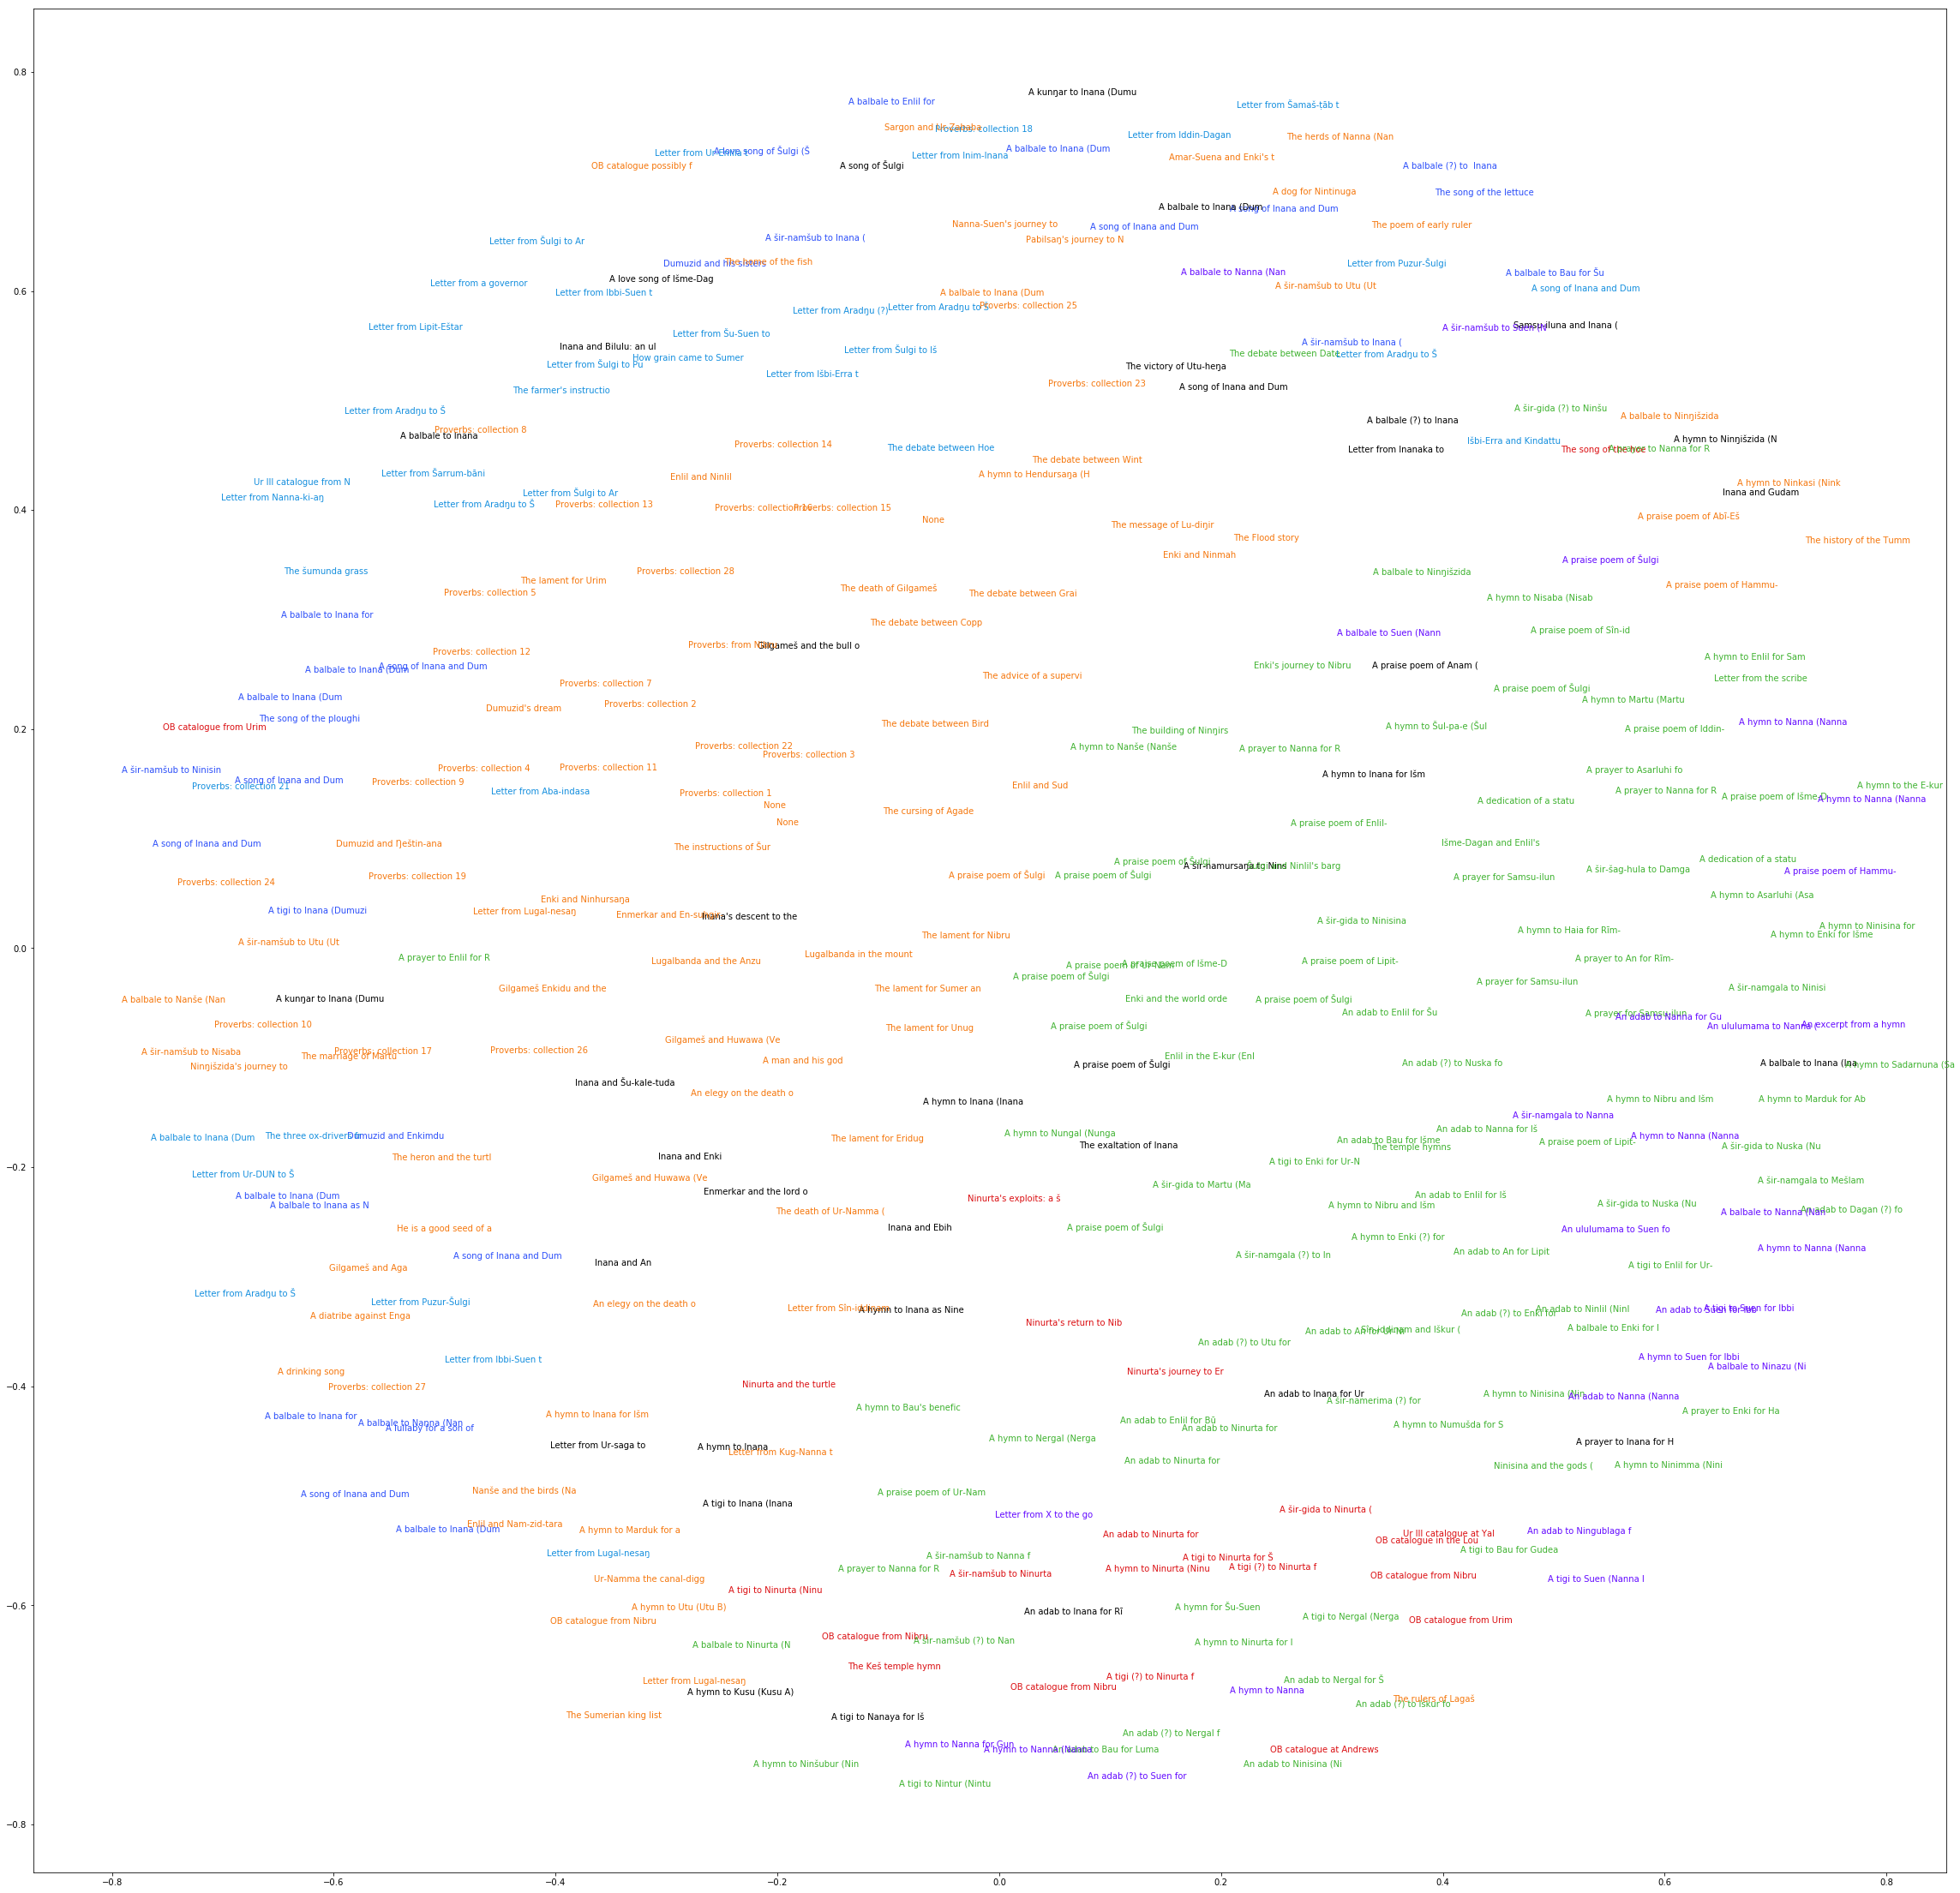

In [48]:
mds_cluster = MDS(n_components = 2, dissimilarity="precomputed") 
embeddings_cluster = mds_cluster.fit_transform(dist_matrix)


    
_, ax = plt.subplots(figsize=(40,40)) #plot
ax.scatter(embeddings_cluster[:,0], embeddings_cluster[:,1], alpha=0)

for i in range(len(cluster_0)):
    c = dict_color_cluster.get("cluster_0") 
    index = get_index(texts, cluster_0[i]) #find the index of the dist_matrix that matches the ith item in cluster
    ax.annotate(labels.get(cluster_0[i]), ((embeddings_cluster[index,0], embeddings_cluster[index,1])), color = c)
for i in range(len(cluster_1)):
    c = dict_color_cluster.get("cluster_1")
    index = get_index(texts, cluster_1[i])
    ax.annotate(labels.get(cluster_1[i]), ((embeddings_cluster[index,0], embeddings_cluster[index,1])), color = c)
for i in range(len(cluster_2)):
    c = dict_color_cluster.get("cluster_2")
    index = get_index(texts, cluster_2[i])
    ax.annotate(labels.get(cluster_2[i]), ((embeddings_cluster[index,0], embeddings_cluster[index,1])), color = c)
for i in range(len(cluster_3)):
    c = dict_color_cluster.get("cluster_3")
    index = get_index(texts, cluster_3[i])
    ax.annotate(labels.get(cluster_3[i]), ((embeddings_cluster[index,0], embeddings_cluster[index,1])), color = c)
for i in range(len(cluster_4)):
    c = dict_color_cluster.get("cluster_4")
    index = get_index(texts, cluster_4[i])
    ax.annotate(labels.get(cluster_4[i]), ((embeddings_cluster[index,0], embeddings_cluster[index,1])), color = c)
for i in range(len(cluster_5)):
    c = dict_color_cluster.get("cluster_5")
    index = get_index(texts, cluster_5[i])
    ax.annotate(labels.get(cluster_5[i]), ((embeddings_cluster[index,0], embeddings_cluster[index,1])), color = c)
for i in range(len(cluster_6)):
    c = dict_color_cluster.get("cluster_6")
    index = get_index(texts, cluster_6[i])
    ax.annotate(labels.get(cluster_6[i]), ((embeddings_cluster[index,0], embeddings_cluster[index,1])), color = c)


plt.show() #graphs the clusters by MDS 